<a href="https://colab.research.google.com/github/RyuSuHyeon98/tutorial/blob/main/221107_ml_%EC%84%A0%ED%98%95%ED%9A%8C%EA%B7%80.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 선형회귀 : 보험료 예측
1. 데이터 수집
2. 데이터 전처리
3. 모델 학습
4. 모델 평가
5. 모델 배포

In [9]:
import pandas as pd
import numpy as np

In [16]:
#@title 데이터 수집
# https://www.kaggle.com/datasets/awaiskaggler/insurance-csv
url = f'https://raw.githubusercontent.com/bigdata-young/bigdata_16th/main/data/insurance.csv'
df = pd.read_csv(url)
df.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [23]:
df.info() #Non-Null Count -> 결측치
# dtype -> datatype

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [29]:
df.describe()

,age,bmi,children,expenses
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.665471,1.094918,13270.422414
std,14.049960,6.098382,1.205493,12110.011240
min,18.000000,16.000000,0.000000,1121.870000
25%,27.000000,26.300000,0.000000,4740.287500
50%,39.000000,30.400000,1.000000,9382.030000
75%,51.000000,34.700000,2.000000,16639.915000
max,64.000000,53.100000,5.000000,63770.430000


In [34]:
pd.options.display.float_format = '{:.2f}'.format

In [35]:
df.describe()

,age,bmi,children,expenses
count,1338.00,1338.00,1338.00,1338.00
mean,39.21,30.67,1.09,13270.42
std,14.05,6.10,1.21,12110.01
min,18.00,16.00,0.00,1121.87
25%,27.00,26.30,0.00,4740.29
50%,39.00,30.40,1.00,9382.03
75%,51.00,34.70,2.00,16639.92
max,64.00,53.10,5.00,63770.43


In [40]:
#@title 데이터 전처리
#@markdown 모델링하기 좋게 데이터를 다듬기

from sklearn.linear_model import LinearRegression

model = LinearRegression

# x : 독립변수들(여러개), y:종속변수(1개)
x = df[['age',	'sex',	'bmi',	'children',	'smoker',	'region']]
y = df.expenses

model.fit(x,y)

KeyError: ignored

In [42]:
df.smoker.unique()

array(['yes', 'no'], dtype=object)

In [43]:
df.smoker.eq('yes') # 같은 결과의 코드 df.smoker == 'yes'

0        True
1       False
2       False
3       False
4       False
        ...  
1333    False
1334    False
1335    False
1336    False
1337     True
Name: smoker, Length: 1338, dtype: bool

In [44]:
df.smoker.eq('yes').mul(1) #df.smoker.eq('yes') * 1 

0       1
1       0
2       0
3       0
4       0
       ..
1333    0
1334    0
1335    0
1336    0
1337    1
Name: smoker, Length: 1338, dtype: int64

In [45]:
df.smoker = df.smoker.eq('yes').mul(1)
df

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.90,0,1,southwest,16884.92
1,18,male,33.80,1,0,southeast,1725.55
2,28,male,33.00,3,0,southeast,4449.46
3,33,male,22.70,0,0,northwest,21984.47
4,32,male,28.90,0,0,northwest,3866.86
...,...,...,...,...,...,...,...
1333,50,male,31.00,3,0,northwest,10600.55
1334,18,female,31.90,0,0,northeast,2205.98
1335,18,female,36.90,0,0,southeast,1629.83
1336,21,female,25.80,0,0,southwest,2007.95


In [50]:
df.sex.unique()

array(['female', 'male'], dtype=object)

In [51]:
df.region.unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [53]:
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker        int64
region       object
expenses    float64
dtype: object

In [56]:
pd.get_dummies(df, columns = ['sex','region'])

,age,bmi,children,smoker,expenses,sex_female,sex_male,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.90,0,1,16884.92,1,0,0,0,0,1
1,18,33.80,1,0,1725.55,0,1,0,0,1,0
2,28,33.00,3,0,4449.46,0,1,0,0,1,0
3,33,22.70,0,0,21984.47,0,1,0,1,0,0
4,32,28.90,0,0,3866.86,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1333,50,31.00,3,0,10600.55,0,1,0,1,0,0
1334,18,31.90,0,0,2205.98,1,0,1,0,0,0
1335,18,36.90,0,0,1629.83,1,0,0,0,1,0
1336,21,25.80,0,0,2007.95,1,0,0,0,0,1


In [57]:
pd.get_dummies(df, columns = ['sex','region'], drop_first=True)

,age,bmi,children,smoker,expenses,sex_male,region_northwest,region_southeast,region_southwest
0,19,27.90,0,1,16884.92,0,0,0,1
1,18,33.80,1,0,1725.55,1,0,1,0
2,28,33.00,3,0,4449.46,1,0,1,0
3,33,22.70,0,0,21984.47,1,1,0,0
4,32,28.90,0,0,3866.86,1,1,0,0
...,...,...,...,...,...,...,...,...,...
1333,50,31.00,3,0,10600.55,1,1,0,0
1334,18,31.90,0,0,2205.98,0,0,0,0
1335,18,36.90,0,0,1629.83,0,0,1,0
1336,21,25.80,0,0,2007.95,0,0,0,1


In [58]:
df_dummy = pd.get_dummies(df, columns = ['sex','region'], drop_first=True)
df_dummy

,age,bmi,children,smoker,expenses,sex_male,region_northwest,region_southeast,region_southwest
0,19,27.90,0,1,16884.92,0,0,0,1
1,18,33.80,1,0,1725.55,1,0,1,0
2,28,33.00,3,0,4449.46,1,0,1,0
3,33,22.70,0,0,21984.47,1,1,0,0
4,32,28.90,0,0,3866.86,1,1,0,0
...,...,...,...,...,...,...,...,...,...
1333,50,31.00,3,0,10600.55,1,1,0,0
1334,18,31.90,0,0,2205.98,0,0,0,0
1335,18,36.90,0,0,1629.83,0,0,1,0
1336,21,25.80,0,0,2007.95,0,0,0,1


## 데이터 전처리(훈련셋, 시험셋)
- 훈련을 한 것으로 모델을 시험을 하면 맞출 수밖에 없음
- 데이터의 일부를 시험셋으로 독립시켜 훈련셋과 시험셋.


In [59]:
# x,y -> 독립변수, 종속변수
df_dummy.tail()

,age,bmi,children,smoker,expenses,sex_male,region_northwest,region_southeast,region_southwest
1333,50,31.00,3,0,10600.55,1,1,0,0
1334,18,31.90,0,0,2205.98,0,0,0,0
1335,18,36.90,0,0,1629.83,0,0,1,0
1336,21,25.80,0,0,2007.95,0,0,0,1
1337,61,29.10,0,1,29141.36,0,1,0,0


In [63]:
df_dummy.columns

Index(['age', 'bmi', 'children', 'smoker', 'expenses', 'sex_male',
       'region_northwest', 'region_southeast', 'region_southwest'],
      dtype='object')

In [64]:
x = df_dummy[['age', 'bmi', 'children', 'smoker', 'sex_male',
       'region_northwest', 'region_southeast', 'region_southwest']]
y = df_dummy.expenses

In [65]:
from sklearn.model_selection import train_test_split

In [66]:
help(train_test_split)

Help on function train_test_split in module sklearn.model_selection._split:

train_test_split(*arrays, test_size=None, train_size=None, random_state=None, shuffle=True, stratify=None)
    Split arrays or matrices into random train and test subsets.
    
    Quick utility that wraps input validation and
    ``next(ShuffleSplit().split(X, y))`` and application to input data
    into a single call for splitting (and optionally subsampling) data in a
    oneliner.
    
    Read more in the :ref:`User Guide <cross_validation>`.
    
    Parameters
    ----------
    *arrays : sequence of indexables with same length / shape[0]
        Allowed inputs are lists, numpy arrays, scipy-sparse
        matrices or pandas dataframes.
    
    test_size : float or int, default=None
        If float, should be between 0.0 and 1.0 and represent the proportion
        of the dataset to include in the test split. If int, represents the
        absolute number of test samples. If None, the value is set to 

In [69]:
# test_size : 비율 -> 데스트셋(시험셋)의 비율
# random_state : seed값 -> 임의로 결정되는 값을 특정 값으로 만듦
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state=100)

## 모델 학습

In [70]:
from sklearn.linear_model import LinearRegression

In [71]:
model = LinearRegression()

In [73]:
model.fit(x_train, y_train)

LinearRegression()

In [76]:
# 예측
pred = model.predict(x_test)
pred

array([ 4331.00324717,  4432.6328141 ,  8450.52715928,  2822.16030428,
       24753.07616919, 37387.9645111 , 15313.52211485,  3154.31364875,
       29032.53764557, 16312.9316321 , 15415.89974014,  4832.13172529,
       11643.57283308,  4790.42460274,  9297.09717818, 31471.3532247 ,
       11695.63693626, 12761.88669628,  6753.25998799, 18342.61770568,
       14184.9599955 ,  2774.89494426,  6794.12596173, 31841.89150412,
       14079.42121975, 32663.31512284,  7077.8307685 , 40045.45982081,
       31721.0611106 , 13400.29558223, 18396.32361721,  2898.21716743,
       39642.67330363, 26779.18200898,  8358.01024104, 12107.96864408,
        8220.54039614, 33042.51856769,  4519.38567369, 38047.88497047,
        7649.38731392, 13069.84456373,  5366.52112937,  8259.15990877,
        1217.42542823,  5176.53768926,  5329.95733386,  4102.64656509,
        2700.45053065, 11043.72334695, 17292.30729979,  7296.10092488,
        5681.39804262,  8817.43159661,  6966.06306507, 13931.29294217,
      

## 모델 평가

In [78]:
comparison = pd.DataFrame({'actual': y_test , 'pred': pred})
comparison

,actual,pred
12,1826.84,4331.00
306,20177.67,4432.63
318,7421.19,8450.53
815,1877.93,2822.16
157,15518.18,24753.08
...,...,...
713,1984.45,6557.66
1282,14283.46,23649.64
531,14043.48,14879.04
537,8825.09,10021.48


## 평가를 시각화

In [80]:
import matplotlib.pyplot as plt
import seaborn as sns

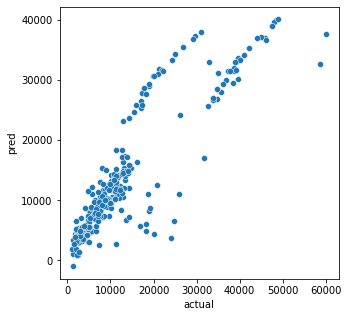

In [87]:
plt.figure(figsize=(5,5))
sns.scatterplot(x = 'actual',y = 'pred', data = comparison)
plt.show()

In [88]:
#@title mean_squared_error
from sklearn.metrics import mean_squared_error

In [91]:
# MSE
# mean_squared_error(y_test, pred) ** 0.5
mean_squared_error(y_test, pred, squared=False)

5673.925913666443

In [92]:
# R²: 결정계수 (독립변수가 종속변수를 얼마나 잘 설명하는가?)
model.score(x_train, y_train)

0.7380843471816282

In [93]:
model.coef_

array([ 2.63734977e+02,  3.11708591e+02,  4.73100524e+02,  2.34920228e+04,
        1.24570883e+01, -4.03279141e+02, -9.17670058e+02, -1.11644405e+03])

In [95]:
pd.Series(model.coef_, index =  x.columns)

age                  263.73
bmi                  311.71
children             473.10
smoker             23492.02
sex_male              12.46
region_northwest    -403.28
region_southeast    -917.67
region_southwest   -1116.44
dtype: float64

In [96]:
model.intercept_

-11353.689780589895

# 모델 배포

In [100]:
!pip install mlxtend --quiet

In [101]:
import joblib

joblib.dump(model, 'first_model.pkl')

['first_model.pkl']

In [103]:
model_from_joblib = joblib.load('first_model.pkl')
pd.Series(model_from_joblib.coef_, index = x.columns)

age                  263.73
bmi                  311.71
children             473.10
smoker             23492.02
sex_male              12.46
region_northwest    -403.28
region_southeast    -917.67
region_southwest   -1116.44
dtype: float64